# Introducción

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats
%matplotlib inline

## 1) Análisis Exploratorio de los Datos.

Realizamos un análisis exploratorio del DataSet EcoBicis extraído de los dataset del Gobierno de la Ciudad. Vamos a devidir el análisis en los siguientes puntos:

- Analisis por Variables individuales o agrupación de las mismas.
- Análisis de correlación entre variables.

In [2]:
# Cargamos los datos
df = pd.read_csv('df_ecobicis_final.csv', sep=',')

In [3]:
df.sample(5)

,Unnamed: 0,bici_id_usuario,bici_Fecha_hora_retiro,bici_tiempo_uso,bici_nombre_estacion_origen,bici_estacion_origen,bici_nombre_estacion_destino,bici_estacion_destino,bici_sexo,bici_edad,...,barrio_origen,comuna_origen,barrio_destino,comuna_destino,feriado,dia,uso_categorico,hora_simple,estacion_agno,rango_horario
2317831,2317831,534824,2018-11-14 19:54:08,9,Austria y French,200,Gallo,154,M,21,...,RECOLETA,2,BALVANERA,3,0,MIERCOLES,BAJO,19,PRIMAVERA,18-23
2112513,2112513,189866,2018-10-21 03:42:21,24,Plaza Palermo Viejo,56,Arenales y Aguero,193,M,26,...,PALERMO,14,RECOLETA,2,0,DOMINGO,BAJO,3,PRIMAVERA,0-5
2614863,2614863,687085,2019-02-10 06:39:54,9,Congreso II,39,Lavalle,84,M,26,...,MONSERRAT,1,BALVANERA,3,0,DOMINGO,BAJO,6,VERANO,6-11
2030448,2030448,259088,2018-10-12 11:35:10,40,Tribunales,11,Corrientes,132,M,23,...,SAN NICOLAS,1,SAN NICOLAS,1,0,VIERNES,ALTO,11,PRIMAVERA,6-11
1474700,1474700,404688,2018-08-23 13:55:21,6,Belgrano,57,Belgrano,57,M,19,...,MONSERRAT,1,MONSERRAT,1,0,JUEVES,BAJO,13,INVIERNO,12-17


In [4]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
df['bici_sexo'].unique()

array(['M', 'F', 'N'], dtype=object)

In [6]:
df.shape

(2779806, 22)

In [7]:
df = df.drop(df.loc[df['bici_sexo']=='N'].index)

In [8]:
df.shape

(2779703, 22)

In [9]:
df.columns

Index(['bici_id_usuario', 'bici_Fecha_hora_retiro', 'bici_tiempo_uso',
       'bici_nombre_estacion_origen', 'bici_estacion_origen',
       'bici_nombre_estacion_destino', 'bici_estacion_destino', 'bici_sexo',
       'bici_edad', 'fecha', 'hora', 'dia_semana', 'barrio_origen',
       'comuna_origen', 'barrio_destino', 'comuna_destino', 'feriado', 'dia',
       'uso_categorico', 'hora_simple', 'estacion_agno', 'rango_horario'],
      dtype='object')

In [10]:
df.isnull().sum()

bici_id_usuario                 0
bici_Fecha_hora_retiro          0
bici_tiempo_uso                 0
bici_nombre_estacion_origen     0
bici_estacion_origen            0
bici_nombre_estacion_destino    0
bici_estacion_destino           0
bici_sexo                       0
bici_edad                       0
fecha                           0
hora                            0
dia_semana                      0
barrio_origen                   0
comuna_origen                   0
barrio_destino                  0
comuna_destino                  0
feriado                         0
dia                             0
uso_categorico                  0
hora_simple                     0
estacion_agno                   0
rango_horario                   0
dtype: int64

In [11]:
df = df.dropna()

In [12]:
df.isnull().sum()

bici_id_usuario                 0
bici_Fecha_hora_retiro          0
bici_tiempo_uso                 0
bici_nombre_estacion_origen     0
bici_estacion_origen            0
bici_nombre_estacion_destino    0
bici_estacion_destino           0
bici_sexo                       0
bici_edad                       0
fecha                           0
hora                            0
dia_semana                      0
barrio_origen                   0
comuna_origen                   0
barrio_destino                  0
comuna_destino                  0
feriado                         0
dia                             0
uso_categorico                  0
hora_simple                     0
estacion_agno                   0
rango_horario                   0
dtype: int64

In [13]:
df.shape

(2779703, 22)

In [14]:
df['uso_categorico'].unique()

array(['BAJO', 'MEDIO', 'ALTO', 'EXCEDIDO'], dtype=object)

In [15]:
df['bici_sexo'].unique()

array(['M', 'F'], dtype=object)

In [16]:
df.loc[df['bici_tiempo_uso'] < 3]

,bici_id_usuario,bici_Fecha_hora_retiro,bici_tiempo_uso,bici_nombre_estacion_origen,bici_estacion_origen,bici_nombre_estacion_destino,bici_estacion_destino,bici_sexo,bici_edad,fecha,...,barrio_origen,comuna_origen,barrio_destino,comuna_destino,feriado,dia,uso_categorico,hora_simple,estacion_agno,rango_horario
2575947,584379,2019-02-22 06:02:05,2,Hospital Italiano,82,Peron y F. Acuña de Figueroa,194,M,29,2019-02-22 00:00:00,...,ALMAGRO,5,ALMAGRO,5,0,VIERNES,BAJO,6,VERANO,6-11
2575971,423794,2019-02-22 05:08:15,2,Corrientes,132,Perón,48,M,58,2019-02-22 00:00:00,...,SAN NICOLAS,1,SAN NICOLAS,1,0,VIERNES,BAJO,5,VERANO,0-5
2576288,313628,2019-02-21 21:13:18,2,Marcelo T. de Alvear,135,Plaza San Martín,19,F,33,2019-02-21 00:00:00,...,RETIRO,1,RETIRO,1,0,JUEVES,BAJO,21,VERANO,18-23
2576323,163383,2019-02-21 20:50:59,2,Ravignani y Guatemala,182,Ravignani,145,M,23,2019-02-21 00:00:00,...,PALERMO,14,PALERMO,14,0,JUEVES,BAJO,20,VERANO,18-23
2576557,577917,2019-02-21 18:55:46,2,Yatay,121,Lerma,109,M,33,2019-02-21 00:00:00,...,ALMAGRO,5,VILLA CRESPO,15,0,JUEVES,BAJO,18,VERANO,18-23
2576833,271966,2019-02-21 16:35:54,2,Gutierrez,90,Hospital Rivadavia,50,M,23,2019-02-21 00:00:00,...,RECOLETA,2,PALERMO,14,0,JUEVES,BAJO,16,VERANO,12-17
2576988,231888,2019-02-21 14:48:22,2,Corrientes,132,Sarmiento,40,M,20,2019-02-21 00:00:00,...,SAN NICOLAS,1,SAN NICOLAS,1,0,JUEVES,BAJO,14,VERANO,12-17
2577333,575352,2019-02-21 12:00:09,2,Las casas,140,Virrey Liniers,139,M,30,2019-02-21 00:00:00,...,BOEDO,5,BOEDO,5,0,JUEVES,BAJO,12,VERANO,12-17
2577861,343162,2019-02-21 07:48:09,2,Bouchard,55,Ingeniero Butty,35,M,37,2019-02-21 00:00:00,...,SAN NICOLAS,1,RETIRO,1,0,JUEVES,BAJO,7,VERANO,6-11
2577944,559553,2019-02-21 07:27:12,2,Plaza Alemania,156,Ugarteche,124,M,25,2019-02-21 00:00:00,...,PALERMO,14,PALERMO,14,0,JUEVES,BAJO,7,VERANO,6-11


Creo las columns de año y mes para propósitos de graficarlos 

In [17]:
df['bici_Fecha_hora_retiro'] = pd.to_datetime(df['bici_Fecha_hora_retiro']) 

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2779703 entries, 0 to 2779805
Data columns (total 22 columns):
bici_id_usuario                 int64
bici_Fecha_hora_retiro          datetime64[ns]
bici_tiempo_uso                 int64
bici_nombre_estacion_origen     object
bici_estacion_origen            int64
bici_nombre_estacion_destino    object
bici_estacion_destino           int64
bici_sexo                       object
bici_edad                       int64
fecha                           object
hora                            object
dia_semana                      int64
barrio_origen                   object
comuna_origen                   int64
barrio_destino                  object
comuna_destino                  int64
feriado                         int64
dia                             object
uso_categorico                  object
hora_simple                     int64
estacion_agno                   object
rango_horario                   object
dtypes: datetime64[ns](1), int6

In [19]:
def return_agno (fecha):
    return fecha.year
def return_mes (fecha):
    return fecha.month

In [20]:
df['agno'] = df['bici_Fecha_hora_retiro'].apply(return_agno)

In [21]:
df['mes'] = df['bici_Fecha_hora_retiro'].apply(return_mes)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2779703 entries, 0 to 2779805
Data columns (total 24 columns):
bici_id_usuario                 int64
bici_Fecha_hora_retiro          datetime64[ns]
bici_tiempo_uso                 int64
bici_nombre_estacion_origen     object
bici_estacion_origen            int64
bici_nombre_estacion_destino    object
bici_estacion_destino           int64
bici_sexo                       object
bici_edad                       int64
fecha                           object
hora                            object
dia_semana                      int64
barrio_origen                   object
comuna_origen                   int64
barrio_destino                  object
comuna_destino                  int64
feriado                         int64
dia                             object
uso_categorico                  object
hora_simple                     int64
estacion_agno                   object
rango_horario                   object
agno                           

In [39]:
def return_rango_edad(e):
    if (e<=20):
        return '0-20'
    elif((e>20) and (e<=30)):
        return '21-30'
    elif((e>30) and (e<=40)):
        return '31-40'
    elif((e>40) and (e<=50)):
        return '41-50'
    elif((e>50) and (e<=60)):
        return '51-60'
    elif((e>60) and (e<=70)):
        return '61-70'
    else:
        return '71-100'
    

In [40]:
df['rango_edad'] = df['bici_edad'].apply(return_rango_edad)

In [41]:
df.sample(5)

,bici_id_usuario,bici_Fecha_hora_retiro,bici_tiempo_uso,bici_nombre_estacion_origen,bici_estacion_origen,bici_nombre_estacion_destino,bici_estacion_destino,bici_sexo,bici_edad,fecha,...,comuna_destino,feriado,dia,uso_categorico,hora_simple,estacion_agno,rango_horario,agno,mes,rango_edad
196726,132669,2018-02-17 22:08:24,15,Guatemala,113,Armenia y Gorriti,142,M,36,2018-02-17 00:00:00,...,14,0,SABADO,BAJO,22,VERANO,18-23,2018,2,31-40
564362,201483,2018-05-06 05:58:57,12,Costa Rica,122,Plaza Monseñor Miguel De Andrea,165,M,36,2018-05-06 00:00:00,...,2,0,DOMINGO,BAJO,5,OTOÑO,0-5,2018,5,31-40
1887221,398733,2018-09-28 22:47:06,21,Carlos Gardel,96,Jose Marmol,178,F,23,2018-09-28 00:00:00,...,5,0,VIERNES,MEDIO,22,PRIMAVERA,18-23,2018,9,21-30
12760,6520,2018-01-04 14:23:23,54,Plaza Italia,5,Pacífico,14,M,39,2018-01-04 00:00:00,...,14,0,JUEVES,ALTO,14,VERANO,12-17,2018,1,31-40
1173831,552888,2018-07-18 09:26:04,19,Pasteur,171,Ingeniero Butty,35,M,51,2018-07-18 00:00:00,...,1,0,MIERCOLES,BAJO,9,INVIERNO,6-11,2018,7,51-60


## 2) Análisis Individual de Variables

### 2.1) Tiempo de Uso.

In [23]:
df['bici_tiempo_uso'].describe()

count    2.779703e+06
mean     2.463645e+01
std      2.233056e+01
min      0.000000e+00
25%      1.100000e+01
50%      1.700000e+01
75%      2.900000e+01
max      1.800000e+02
Name: bici_tiempo_uso, dtype: float64

In [24]:
df['bici_tiempo_uso'].mean()

24.636454685986237

Tiempo de uso por genero y mes

In [25]:
df_aux = df[['agno','mes','bici_sexo','bici_tiempo_uso']].groupby(['agno','mes','bici_sexo']).count()


In [26]:
df_aux

bici_tiempo_uso
agno mes bici_sexo                 
2018 1   F                    31922
         M                    84299
     2   F                    34075
         M                    86265
     3   F                    30986
         M                    80065
     4   F                    50821
         M                   134251
     5   F                    66085
         M                   177366
     6   F                    71841
         M                   187923
     7   F                    57513
         M                   161637
     8   F                    88050
         M                   225817
     9   F                    99161
         M                   231624
     10  F                    89653
         M                   211761
     11  F                    67616
         M                   166493
     12  F                    38166
         M                   102380
2019 1   F                    34192
         M                    94516
     2   F                    20049
         M                    55176

In [27]:
df_aux = df_aux.reset_index()

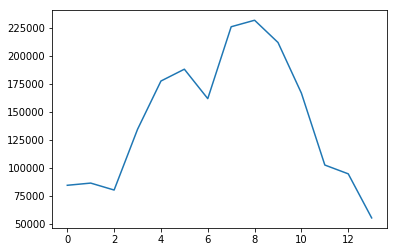

In [28]:
y = df_aux.loc[df_aux['bici_sexo']=='M', 'bici_tiempo_uso']
x =range(len(y))
plt.plot(x,y);

In [29]:
y_m = df_aux.loc[df_aux['bici_sexo']=='M', 'bici_tiempo_uso']
y_f = df_aux.loc[df_aux['bici_sexo']=='F', 'bici_tiempo_uso']

index_ = ['18-ene','18-feb','18-mar','18-abr','18-may','18-jun','18-jul','18-ago','18-sep','18-oct',\
         '18-nov','18-dic','19-ene','19-feb']  

In [30]:
y_m.index = index_
y_f.index = index_

In [31]:
dat  = {'M': y_m, 'F': y_f}

In [55]:
type(dat)

dict

In [32]:
df_a = pd.DataFrame(index = index_, data=dat)

In [33]:
df_a

,M,F
18-ene,84299,31922
18-feb,86265,34075
18-mar,80065,30986
18-abr,134251,50821
18-may,177366,66085
18-jun,187923,71841
18-jul,161637,57513
18-ago,225817,88050
18-sep,231624,99161
18-oct,211761,89653


In [34]:
y_m.index = index_

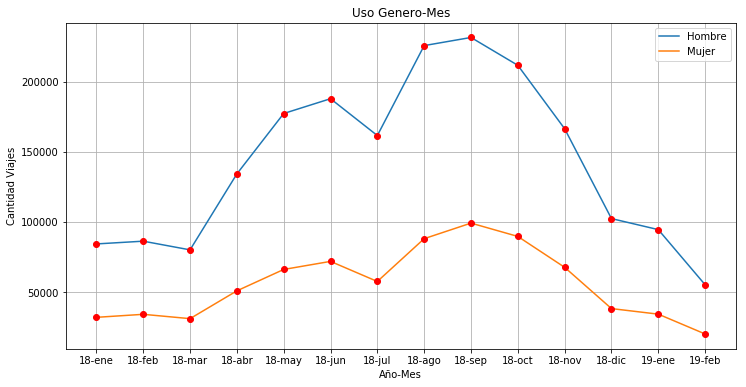

In [35]:
# el parámetro figsize define el tamaño de la figura en (width, height)

ancho = 12
alto  = 6
plt.figure( figsize = (ancho, alto))


plt.plot(df_a['M'], lw=1.5, label='Hombre')
plt.plot(df_a['F'], lw=1.5, label='Mujer')

plt.plot(df_a, 'ro')

plt.legend(loc=0)

# El metodo grid dibuja una grilla de fondo
plt.grid(True)

# elegimos el texto
plt.axis('tight')
plt.xlabel('Año-Mes')
plt.ylabel('Cantidad Viajes')
plt.title('Uso Genero-Mes');

In [38]:
plt.savefig('grafico.jpg')

<Figure size 432x288 with 0 Axes>

In [ ]:
# turistas[['PASAJEROS', 'PERNOCTACIONES','PAIS_EXT']]\
# .groupby('PAIS_EXT').sum().sort_values("PASAJEROS", ascending = False) #.head()

df.loc[(df['bici_sexo']=='M'),('agno','mes','bici_sexo','bici_tiempo_uso')].groupby(['agno','mes','bici_sexo']).count()
#df.loc[(df['bici_sexo']=='M'), 'fecha'] #.groupby(['agno','mes','bici_sexo']).count()

bici_tiempo_uso
agno mes bici_sexo                 
2018 1   M                    84299
     2   M                    86265
     3   M                    80065
     4   M                   134251
     5   M                   177366
     6   M                   187923
     7   M                   161637
     8   M                   225817
     9   M                   231624
     10  M                   211761
     11  M                   166493
     12  M                   102380
2019 1   M                    94516
     2   M                    55176

In [42]:
df_aux2 = df[['agno','mes','bici_sexo','rango_edad','bici_tiempo_uso']].groupby(['agno','mes','bici_sexo','rango_edad']).count()

In [43]:
df_aux2

bici_tiempo_uso
agno mes bici_sexo rango_edad                 
2018 1   F         0-20                   1467
                   21-30                 14097
                   31-40                  8133
                   41-50                  4682
                   51-60                  2594
                   61-70                   755
                   71-100                  194
         M         0-20                   4274
                   21-30                 33546
                   31-40                 25136
                   41-50                 12744
                   51-60                  5829
                   61-70                  2276
                   71-100                  494
     2   F         0-20                   1659
                   21-30                 15421
                   31-40                  8588
                   41-50                  4817
                   51-60                  2693
                   61-70                   712
                   71-100                  185
         M         0-20                   5167
                   21-30                 35521
                   31-40                 24199
                   41-50                 12285
                   51-60                  6264
                   61-70                  2328
                   71-100                  501
     3   F         0-20                   1765
                   21-30                 13626
...                                        ...
     12  M         61-70                  1870
                   71-100                  340
2019 1   F         0-20                   2135
                   21-30                 15305
                   31-40                  8240
                   41-50                  5039
                   51-60                  2776
                   61-70                   604
                   71-100                   93
         M         0-20                   6083
                   21-30                 40023
                   31-40                 27097
                   41-50                 13623
                   51-60                  5692
                   61-70                  1648
                   71-100                  350
     2   F         0-20                   1413
                   21-30                  9200
                   31-40                  4732
                   41-50                  2852
                   51-60                  1512
                   61-70                   308
                   71-100                   32
         M         0-20                   4314
                   21-30                 23910
                   31-40                 15059
                   41-50                  7368
                   51-60                  3473
                   61-70                   869
                   71-100                  183

[196 rows x 1 columns]

In [44]:
df_aux2 = df_aux2.reset_index()

In [91]:
df_aux2

,agno,mes,bici_sexo,rango_edad,bici_tiempo_uso
0,2018,1,F,0-20,1467
1,2018,1,F,21-30,14097
2,2018,1,F,31-40,8133
3,2018,1,F,41-50,4682
4,2018,1,F,51-60,2594
5,2018,1,F,61-70,755
6,2018,1,F,71-100,194
7,2018,1,M,0-20,4274
8,2018,1,M,21-30,33546
9,2018,1,M,31-40,25136


In [89]:
a = df_aux2.loc[df_aux2['bici_sexo'] == 'F']

In [90]:
a.loc[a['rango_edad'] == '21-30', 'bici_tiempo_uso']

1      14097
15     15421
29     13626
43     23460
57     30795
71     34381
85     27362
99     42589
113    48448
127    43086
141    31057
155    17311
169    15305
183     9200
Name: bici_tiempo_uso, dtype: int64

In [92]:
def return_columns(df):
    index_ = ['18-ene','18-feb','18-mar','18-abr','18-may','18-jun','18-jul','18-ago','18-sep',\
              '18-oct','18-nov','18-dic','19-ene','19-feb']  
    dic = {}
    for a in df['bici_sexo'].unique():
        aux_a = df.loc[df['bici_sexo'] == a]
        #print(aux_a)
        for b in df['rango_edad'].unique():
            aux_b = aux_a.loc[aux_a['rango_edad'] == b, 'bici_tiempo_uso']
            aux_b.index = index_
            dic[a+'-'+b] = aux_b
            #print(a+'-'+b)
    return dic

In [93]:
dat2 = return_columns(df_aux2)

In [94]:
df_a2 = pd.DataFrame(index = index_, data=dat2)

In [95]:
df_a2

,F-0-20,F-21-30,F-31-40,F-41-50,F-51-60,F-61-70,F-71-100,M-0-20,M-21-30,M-31-40,M-41-50,M-51-60,M-61-70,M-71-100
18-ene,1467,14097,8133,4682,2594,755,194,4274,33546,25136,12744,5829,2276,494
18-feb,1659,15421,8588,4817,2693,712,185,5167,35521,24199,12285,6264,2328,501
18-mar,1765,13626,7706,4630,2479,524,256,5339,32380,21592,12465,5801,2039,449
18-abr,3033,23460,12241,7284,3719,792,292,8250,56654,36510,19812,9578,2891,556
18-may,3887,30795,15685,9508,4788,1114,308,10929,75696,49309,25239,11891,3576,726
18-jun,4057,34381,16576,10454,4906,1212,255,12357,80469,50771,26950,12697,3862,817
18-jul,3185,27362,13123,8629,3981,974,259,10772,69323,44465,22319,10788,3359,611
18-ago,5980,42589,19682,12197,5843,1463,296,15603,98363,61426,30925,14389,4260,851
18-sep,7108,48448,21933,13074,6799,1531,268,17598,104484,60874,29560,14198,4055,855
18-oct,6486,43086,19797,12112,6458,1465,249,16595,93933,55914,27374,13624,3637,684


In [96]:
df_a2.columns

Index(['F-0-20', 'F-21-30', 'F-31-40', 'F-41-50', 'F-51-60', 'F-61-70',
       'F-71-100', 'M-0-20', 'M-21-30', 'M-31-40', 'M-41-50', 'M-51-60',
       'M-61-70', 'M-71-100'],
      dtype='object')

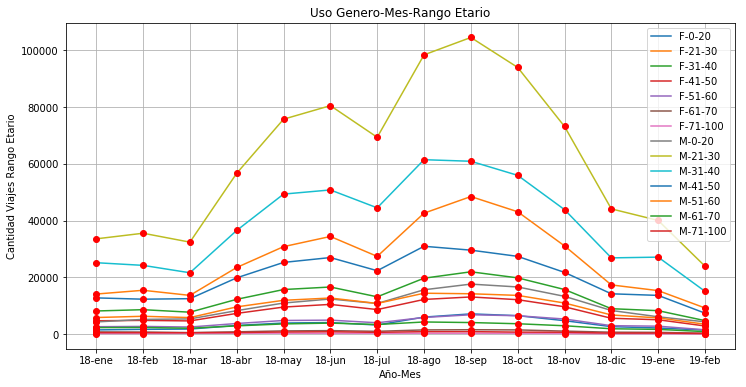

In [97]:
# el parámetro figsize define el tamaño de la figura en (width, height)

ancho = 12
alto  = 6
plt.figure( figsize = (ancho, alto))


# plt.plot(df_a2['M'], lw=1.5)
# plt.plot(df_a['F'], lw=1.5, label='Mujer')
for i in df_a2.columns:
    plt.plot(df_a2[i],lw=1.5)

plt.plot(df_a2, 'ro')

plt.legend(loc=0)

# El metodo grid dibuja una grilla de fondo
plt.grid(True)

# elegimos el texto
plt.axis('tight')
plt.xlabel('Año-Mes')
plt.ylabel('Cantidad Viajes Rango Etario')
plt.title('Uso Genero-Mes-Rango Etario');

In [101]:
df_a2f = df_a2[['F-0-20', 'F-21-30', 'F-31-40', 'F-41-50', 'F-51-60', 'F-61-70','F-71-100']]
df_a2m = df_a2[['M-0-20', 'M-21-30', 'M-31-40', 'M-41-50', 'M-51-60','M-61-70', 'M-71-100']]

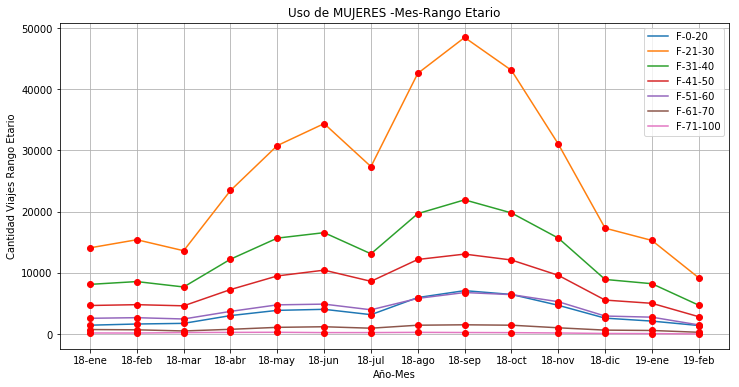

In [102]:
ancho = 12
alto  = 6
plt.figure( figsize = (ancho, alto))


# plt.plot(df_a2['M'], lw=1.5)
# plt.plot(df_a['F'], lw=1.5, label='Mujer')
for i in df_a2f.columns:
    plt.plot(df_a2f[i],lw=1.5)

plt.plot(df_a2f, 'ro')

plt.legend(loc=0)

# El metodo grid dibuja una grilla de fondo
plt.grid(True)

# elegimos el texto
plt.axis('tight')
plt.xlabel('Año-Mes')
plt.ylabel('Cantidad Viajes Rango Etario')
plt.title('Uso de MUJERES -Mes-Rango Etario');

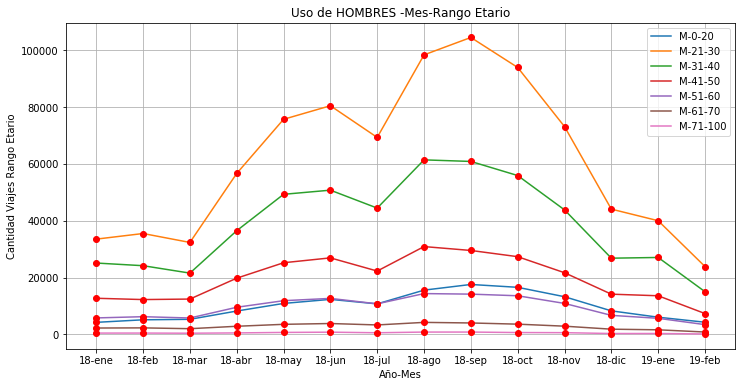

In [103]:
ancho = 12
alto  = 6
plt.figure( figsize = (ancho, alto))


# plt.plot(df_a2['M'], lw=1.5)
# plt.plot(df_a['F'], lw=1.5, label='Mujer')
for i in df_a2m.columns:
    plt.plot(df_a2m[i],lw=1.5)

plt.plot(df_a2m, 'ro')

plt.legend(loc=0)

# El metodo grid dibuja una grilla de fondo
plt.grid(True)

# elegimos el texto
plt.axis('tight')
plt.xlabel('Año-Mes')
plt.ylabel('Cantidad Viajes Rango Etario')
plt.title('Uso de HOMBRES -Mes-Rango Etario');

In [104]:
df_a2m2.columns

Index(['M-0-20', 'M-21-30', 'M-31-40', 'M-41-50', 'M-51-60', 'M-61-70',
       'M-71-100'],
      dtype='object')

In [106]:
df_a2m2 = df_a2m[['M-0-20', 'M-21-30', 'M-31-40', 'M-41-50']]
df_a2m2['M-51-100'] = df_a2m['M-51-60'] + df_a2m['M-61-70'] + df_a2m['M-71-100']

C:\Users\Hernan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [109]:
df_a2m2
df_a2m2.rename(columns={'M-0-20': '0-20', 'M-21-30': '21-30', 'M-31-40' : '31-40', 'M-41-50' : '41-50','M-51-100':'51-100' }, inplace=True)

C:\Users\Hernan\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


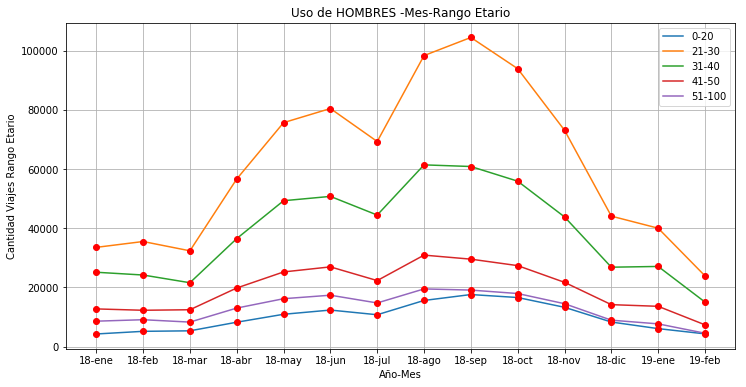

In [110]:
ancho = 12
alto  = 6
plt.figure( figsize = (ancho, alto))


# plt.plot(df_a2['M'], lw=1.5)
# plt.plot(df_a['F'], lw=1.5, label='Mujer')
for i in df_a2m2.columns:
    plt.plot(df_a2m2[i],lw=1.5)

plt.plot(df_a2m2, 'ro')

plt.legend(loc=0)

# El metodo grid dibuja una grilla de fondo
plt.grid(True)

# elegimos el texto
plt.axis('tight')
plt.xlabel('Año-Mes')
plt.ylabel('Cantidad Viajes Rango Etario')
plt.title('Uso de HOMBRES -Mes-Rango Etario');

In [111]:
df_a2f2 = df_a2f[['F-0-20', 'F-21-30', 'F-31-40', 'F-41-50']]
df_a2f2['F-51-100'] = df_a2f['F-51-60'] + df_a2f['F-61-70'] + df_a2f['F-71-100']

C:\Users\Hernan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [112]:
df_a2f2
df_a2f2.rename(columns={'F-0-20': '0-20', 'F-21-30': '21-30', 'F-31-40' : '31-40', 'F-41-50' : '41-50','F-51-100':'51-100' }, inplace=True)

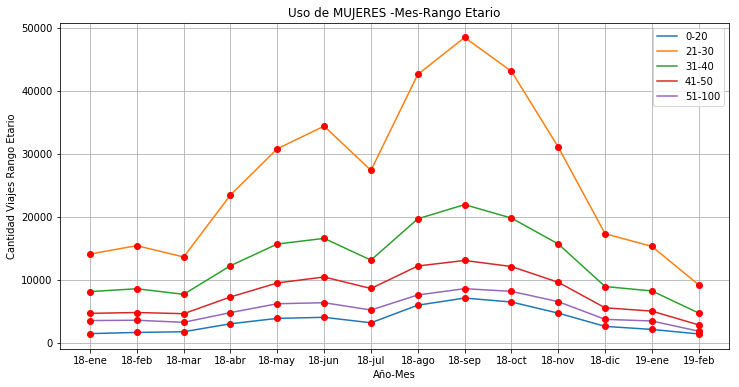

In [113]:
ancho = 12
alto  = 6
plt.figure( figsize = (ancho, alto))


# plt.plot(df_a2['M'], lw=1.5)
# plt.plot(df_a['F'], lw=1.5, label='Mujer')
for i in df_a2f2.columns:
    plt.plot(df_a2f2[i],lw=1.5)

plt.plot(df_a2f2, 'ro')

plt.legend(loc=0)

# El metodo grid dibuja una grilla de fondo
plt.grid(True)

# elegimos el texto
plt.axis('tight')
plt.xlabel('Año-Mes')
plt.ylabel('Cantidad Viajes Rango Etario')
plt.title('Uso de MUJERES -Mes-Rango Etario');

In [114]:
plt.savefig('MUJERES -Mes-Rango Etario.jpg')

<Figure size 432x288 with 0 Axes>

In [115]:
df_a2.columns

Index(['F-0-20', 'F-21-30', 'F-31-40', 'F-41-50', 'F-51-60', 'F-61-70',
       'F-71-100', 'M-0-20', 'M-21-30', 'M-31-40', 'M-41-50', 'M-51-60',
       'M-61-70', 'M-71-100'],
      dtype='object')

Muestro comparativa de géneros en los 3 rangos etarios más representativos

In [119]:
df_a2_split = df_a2[[ 'F-21-30', 'F-31-40', 'F-41-50', 'M-21-30', 'M-31-40', 'M-41-50']]

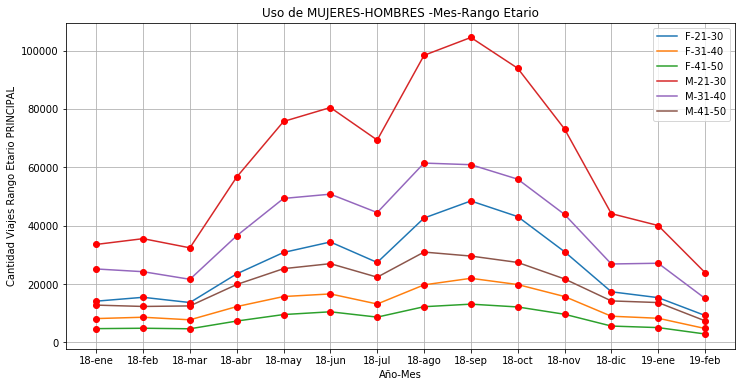

In [120]:
ancho = 12
alto  = 6
plt.figure( figsize = (ancho, alto))


# plt.plot(df_a2['M'], lw=1.5)
# plt.plot(df_a['F'], lw=1.5, label='Mujer')
for i in df_a2_split.columns:
    plt.plot(df_a2_split[i],lw=1.5)

plt.plot(df_a2_split, 'ro')

plt.legend(loc=0)

# El metodo grid dibuja una grilla de fondo
plt.grid(True)

# elegimos el texto
plt.axis('tight')
plt.xlabel('Año-Mes')
plt.ylabel('Cantidad Viajes Rango Etario PRINCIPAL')
plt.title('Uso de MUJERES-HOMBRES -Mes-Rango Etario');